# Titanic - A Statistical Survival Guide

In [1]:
# Import necessary libraries
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Libraries for Data manipulation
import numpy as np 
import pandas as pd 
import seaborn as sns

# Importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Data Preprocessing

In [2]:
# Loading the Dataset
train_data = pd.read_csv('../input/titanic/train.csv')
test_data = pd.read_csv('../input/titanic/test.csv')

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print the datatypes of all columns
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Printing the no. of NaN values in all columns

print("Training Data Missing Values:\n",train_data.isna().sum())
print("\nTest Data Missing Values:\n",test_data.isna().sum())

Training Data Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Test Data Missing Values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
# Cabin column seems to have a lot of missing values.
# We will replace all values with the first alphabet of the Cabin

train_data['Cabin'] = train_data['Cabin'].apply(lambda x: str(x)[0])
test_data['Cabin'] = test_data['Cabin'].apply(lambda x: str(x)[0])

# Null values will be set to 'n'
print("Cabin:", train_data['Cabin'].unique())

Cabin: ['n' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [6]:
# First, let's replace NaN embarkations with the modal value of embarkation

mode_embarked = train_data['Embarked'].mode()[0]
train_data['Embarked'].fillna(value=mode_embarked, inplace=True)

print("Number of missing values in the Embarked column: ", train_data['Embarked'].isna().sum())

Number of missing values in the Embarked column:  0


In [7]:
# Next, let's replace NaN Ages with the mean age in the dataset

mean_training_age = train_data['Age'].mean()
mean_testing_age = test_data['Age'].mean()

print("Mean training data is: ", mean_training_age)
print("Mean testing data is: ",mean_testing_age)

# Replace NaN values of Age column with Mean
train_data['Age'].fillna(value=mean_training_age, inplace=True)
test_data['Age'].fillna(value=mean_testing_age, inplace=True)

print("\nNumber of missing training values in the Age column: ", train_data['Age'].isna().sum())
print("Number of missing testing values in the Age column: ", test_data['Age'].isna().sum())

Mean training data is:  29.69911764705882
Mean testing data is:  30.272590361445783

Number of missing training values in the Age column:  0
Number of missing testing values in the Age column:  0


In [8]:
# First, we'll fix 1 NaN value in fare column of test data

mean_testing_fare = test_data['Fare'].mean()
test_data['Fare'].fillna(value=mean_testing_fare, inplace=True)

print("Mean Fare in the testing data is: ", mean_testing_fare)
print("Number of missing testing values in the fare column: ", test_data['Fare'].isna().sum())

Mean Fare in the testing data is:  35.6271884892086
Number of missing testing values in the fare column:  0


In [9]:
# A Final check to ensure no null values remain

print("Training Data Missing Values:\n",train_data.isna().sum())
print("\nTest Data Missing Values:\n",test_data.isna().sum())

Training Data Missing Values:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Test Data Missing Values:
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


## Visualizing The Data

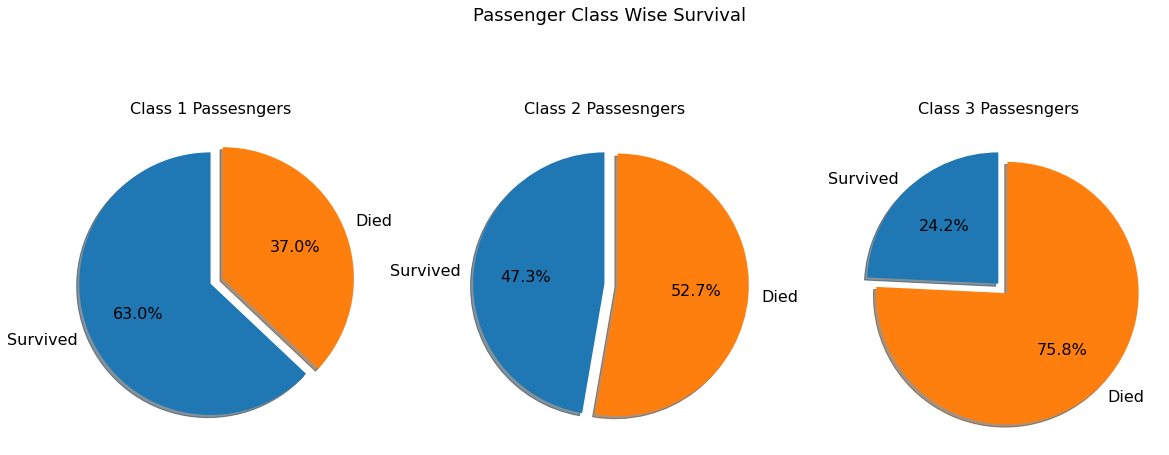

In [10]:
# Class wise Survival

pclasses = np.sort(train_data.Pclass.unique())

labels = ['Survived', 'Died']
fig, axes = plt.subplots(1, 3, figsize=(20, 35))
axes_flat = axes.flatten()
explode = (0, 0.1)

for i in range(len(pclasses)):
    axis = axes_flat[i]
    
    pclass_data = train_data[train_data.Pclass == pclasses[i]]
    survived = pclass_data[pclass_data.Survived == 1].shape[0]
    died = pclass_data.Survived.shape[0] - survived
    
    axis.pie([survived, died], labels=labels, explode=explode, 
             shadow=True, startangle=90, autopct='%1.1f%%',
             textprops={'fontsize': 16})
    axis.set_title("Class {} Passesngers".format(pclasses[i]), fontdict={'size':16})

plt.text(x=-4, y=2, s="Passenger Class Wise Survival", fontdict={'size':18})
plt.show()

**Class Matters**

![Image](http://rpmarchildon.com/wp-content/uploads/2018/06/titanic_class_cabin_locations.png)&nbsp;


The above image shows where different classes of passengers stayed.&nbsp;

The image clearly shows that Class 1 and Class 2 were closer to the deck and hence to the lifeboats.

Thus they had an obvious survival advantage, with more than 60 and 45 percent chance of survival.

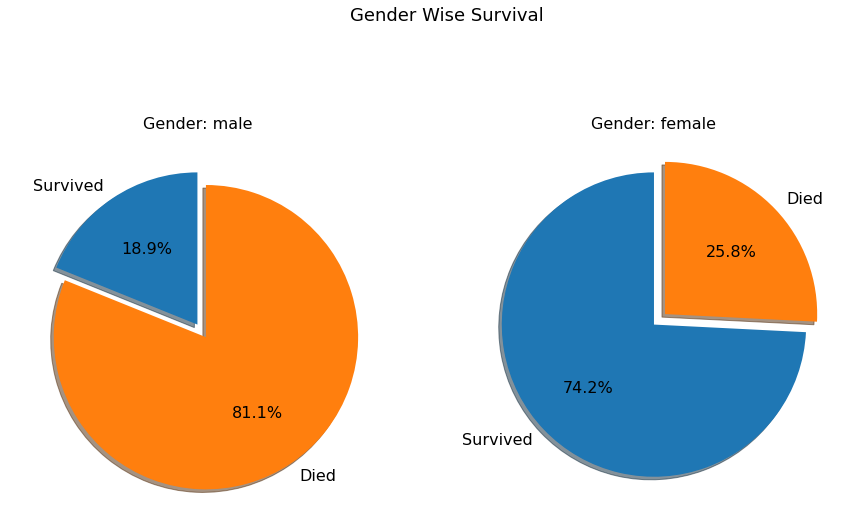

In [11]:
# Gender wise Survival

gender = ['male', 'female']
labels = ['Survived', 'Died']

fig, axes = plt.subplots(1, 2, figsize=(15, 20))
axes_flat = axes.flatten()
explode = (0, 0.1)

for i in range(len(gender)):
    axis = axes_flat[i]
    
    gender_data = train_data[train_data.Sex == gender[i]]
    survived = gender_data[gender_data.Survived == 1].shape[0]
    died = gender_data.Survived.shape[0] - survived
    
    axis.pie([survived, died], labels=labels, explode=explode, 
             shadow=True, startangle=90, autopct='%1.1f%%', 
             textprops={'fontsize': 16})
    axis.set_title("Gender: {}".format(gender[i]), fontdict={'fontsize':16})

plt.text(x=-2, y=2, s="Gender Wise Survival", fontdict={'size':18})
plt.show()

**The Unspoken *Women First* Rule**

The above mentioned statistics highlight the common notion about any emergency evacuation. 
Women and children are given priority, their lives are saved first in a life-threatening situation.

It must be stated here that there is no maritime law/protocol stated related to this. The most vulnerable people, those in need of help must be prioritised in any emergency situation.

<Figure size 864x432 with 0 Axes>

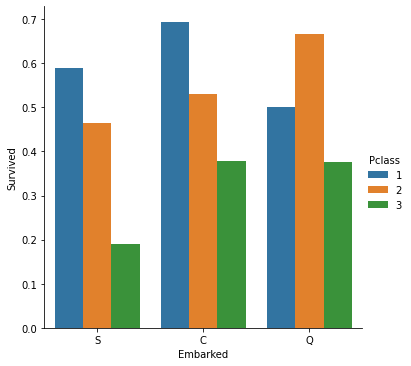

In [12]:
# Place of Embarkment and Survival Rate

plt.figure(figsize=(12,6))
sns.catplot(x='Embarked', y='Survived', ci=None, kind='bar', hue='Pclass', data=train_data)

plt.show()

The above graph shows the chance of survival according to the port of embarkment. 

It is interesting to note that class 2 passengers who boarded at Queenstown (Q) had a better survival rate than class 1 passengers from Queenstown and almost comparable to class 1 passengers from Cherbourg. 

We will look more into why this was the case.

In [13]:
# Finding Embarkment wise survival
grouped_survived = train_data.groupby(['Embarked'])['Survived'].sum()
grouped_survived

Embarked
C     93
Q     30
S    219
Name: Survived, dtype: int64

In [14]:
# Finding the number of class 1 passengers from queenstown
num_queenstown = train_data[train_data['Embarked'] == 'Q']
num_class = num_queenstown[num_queenstown['Pclass'] == 2]
num_survived = num_class[num_class['Survived'] == 1]

print("Total number of passengers survived from Queenstown are/is:", grouped_survived['Q'])
print("Total number of passengers of class 2 from Queenstown are/is:",num_class['PassengerId'].count())
print("Number of class 2 passengers that survived from Queenstown are/is:", num_survived['PassengerId'].count())

Total number of passengers survived from Queenstown are/is: 30
Total number of passengers of class 2 from Queenstown are/is: 3
Number of class 2 passengers that survived from Queenstown are/is: 2


Well, it seems that the number of passengers in class 2 from Quenstown were only 3

Hence it will be wrong to assume anything for the passengers who boarded from Queenstown solely based on the Port of Embarkment.

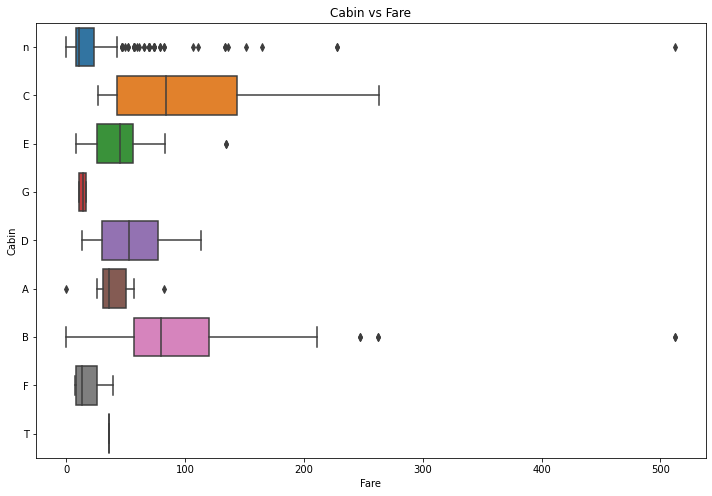

In [15]:
# Cabin, class and Fare prices
plt.figure(figsize=(12,8))
sns.boxplot(y='Cabin', x='Fare', data=train_data)
plt.title("Cabin vs Fare")

plt.show()

It is observed that, in general Cabins B and C have a higher fare/cost. 

<img src="https://upload.wikimedia.org/wikipedia/commons/0/0d/Olympic_%26_Titanic_cutaway_diagram.png" 
     alt="diagram" width="500" style="  display: block; margin-left: auto; margin-right: auto;"/>

The above picture shows the cabin layout for the ship. 

The Cabins A, B and C are closer to the deck, and thus the passengers in these decks will have a better survival chance.

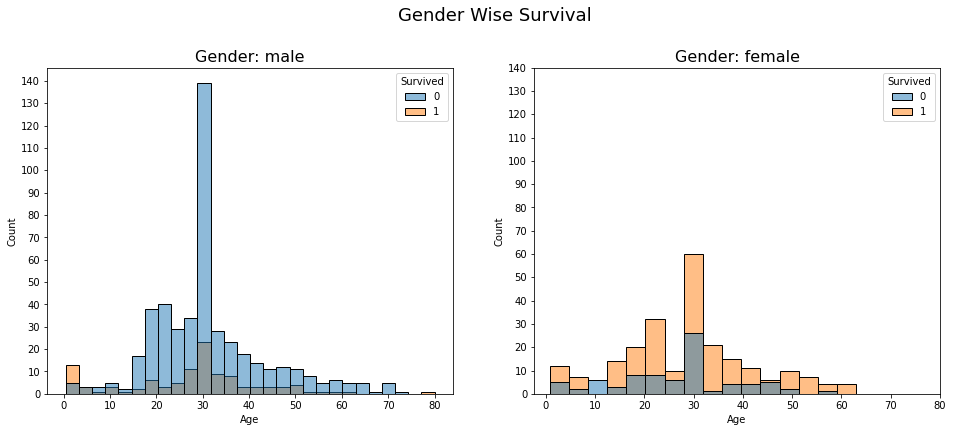

In [16]:
# Age wise Survival

gender = ['male', 'female']
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
axes_flat = axes.flatten()
x_ticks = [i for i in range(0, 90, 10)]
y_ticks = [i for i in range(0, 150, 10)]

for i in range(len(gender)):                                        # For male and female
    axis = axes_flat[i]
    
    gender_data = train_data[train_data.Sex == gender[i]]
    sns.histplot(data=gender_data, x=gender_data.Age, hue='Survived', ax=axis)
    
    axis.set_xticks(x_ticks)
    axis.set_xticklabels(x_ticks)
    axis.set_yticks(y_ticks)
    axis.set_yticklabels(y_ticks)
    axis.set_title("Gender: {}".format(gender[i]), fontdict={'fontsize':16})

plt.text(s="Gender Wise Survival", y=160, x=-30, fontdict={'size':18})
plt.show()

Both the graphs exhibit a normal distribution, the only difference being the lower percentage of survival in each age category for males.

While females have a 50percent survival chance in almost every age group, no ages of males who survived dominates the ones who did not.

Apart from the Gender bias, it seems that the percent of passengers (children below 20) seem to have a better survival rate. Age group 15-30 have a mediocre survival chance.

In [17]:
# Analysing ticket data
train_data.Ticket.describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [18]:
# Since the number of unique values in ticket is too large, it cannot be generalised and used.
# Thus we drop the column entirely

train_data.drop(labels="Ticket", axis=1 ,inplace=True)
test_data.drop(labels="Ticket", axis=1 ,inplace=True)

In [19]:
# Used to encode categorical values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
# Encoding Sex with 0 and 1
train_data['Sex'] = encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = encoder.transform(test_data['Sex'])

In [21]:
# Similarly, we encode all the ports

train_data['Embarked'] = encoder.fit_transform(train_data['Embarked'])
test_data['Embarked'] = encoder.transform(test_data['Embarked'])

In [22]:
# And then we also encode cabin data

train_data['Cabin'] = encoder.fit_transform(train_data['Cabin'])
test_data['Cabin'] = encoder.transform(test_data['Cabin'])

### Feature Engineering

In [23]:
# Making a new Feature called Title

data_all = [train_data, test_data]

for data in data_all:
    data['Title'] = data['Name'].apply(lambda x: x.split(", ")
    [1].split(".")[0])

    # Grouping similar titles
    data['Title'].replace(['Miss', 'Mrs', 'Mme', 'Mlle', 'Ms'], 'Mrs/Ms/Miss', inplace=True)
    data['Title'].replace(['Lady', 'the Countess'], 'Noble Females', inplace=True)
    data['Title'].replace(['Dr', 'Don', 'Rev', 'Col', 'Capt', 'Jonkheer', 'Major', 'Sir'], 
                          'Nobility/Doctor/Clergy/Navy', inplace=True)
    
print("Training data titles: \n", train_data['Title'].unique())
print("\nTesting data titles: \n", test_data['Title'].unique())

Training data titles: 
 ['Mr' 'Mrs/Ms/Miss' 'Master' 'Nobility/Doctor/Clergy/Navy' 'Noble Females']

Testing data titles: 
 ['Mr' 'Mrs/Ms/Miss' 'Master' 'Nobility/Doctor/Clergy/Navy' 'Dona']


In [24]:
# We observe that we get an exception where title is set as Dona
# Let us replace it with Mrs/Ms/Miss title

test_data['Title'].replace('Dona', 'Mrs/Ms/Miss', inplace=True)
print('Testing data titles: \n', test_data['Title'].unique())

Testing data titles: 
 ['Mr' 'Mrs/Ms/Miss' 'Master' 'Nobility/Doctor/Clergy/Navy']


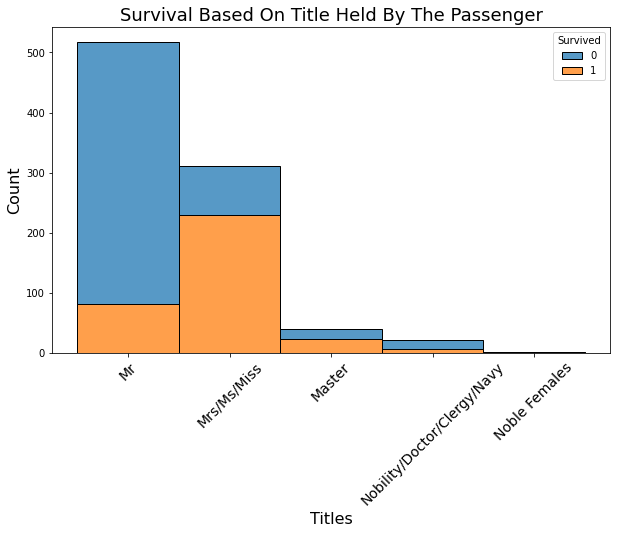

In [25]:
# Plotting and analysing data with the help of the new feature

plt.figure(figsize=(10,6))
plt.xlabel('Titles', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.ylabel('Count', fontsize=16)

sns.histplot(data=train_data, x=train_data['Title'], hue='Survived', multiple='stack')

plt.title('Survival Based On Title Held By The Passenger', fontsize=18)
plt.show()

In [26]:
# Finally, we encode the new feature created

train_data['Title'] = encoder.fit_transform(train_data['Title'])
test_data['Title'] = encoder.transform(test_data['Title'])

## Building The Machine Learning Model

In [27]:
# Drop the unecessary columns for the training and testing dataset

X_train = train_data.drop(["Survived", "Name", "PassengerId"], axis=1)
y_train = train_data["Survived"]
X_test  = test_data.drop(["PassengerId", "Name"], axis=1).copy()

In [28]:
# Cross Validation for Analysing Models

from sklearn.model_selection import cross_val_score, StratifiedKFold

# We will append cross validation scores of each model used
cv_results = {'Model':[], 'Score':[]}

# Generating KFold validation sets
kfold = StratifiedKFold(n_splits=10)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(solver='liblinear')
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

cv_score = cross_val_score(log_model, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4).mean()
cv_results['Model'].append('Logistic Regression')
cv_results['Score'].append(cv_score)

### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

cv_score = cross_val_score(nb_model, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4).mean()
cv_results['Model'].append('Naive Bayes')
cv_results['Score'].append(cv_score)

### Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(max_depth=10)
# Note: Max depth set to 10 to prevent overfitting 

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

cv_score = cross_val_score(rf_model, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4).mean()
cv_results['Model'].append('Random Forest')
cv_results['Score'].append(cv_score)

### SVC

In [32]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

cv_score = cross_val_score(svc_model, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4).mean()
cv_results['Model'].append('Support Vectors')
cv_results['Score'].append(cv_score)

### K-Nearest Neighbors

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

cv_score = cross_val_score(knn_model, X_train, y_train, scoring = "accuracy", cv = kfold, n_jobs=4).mean()
cv_results['Model'].append('K-Nearest Neighbors')
cv_results['Score'].append(cv_score)

### Final Predictions

In [34]:
result_df = pd.DataFrame.from_dict(cv_results)

#Note that this is corss-validation score and not the final score 
result_df

,Model,Score
0,Logistic Regression,0.795730
1,Naive Bayes,0.764282
2,Random Forest,0.833920
3,Support Vectors,0.677953
4,K-Nearest Neighbors,0.720562


In [35]:
# So we will be using random forest as the model of choice.
passenger_id = test_data['PassengerId'] # This will come in useful at the time of submission
test_data.drop(["PassengerId", "Name"], axis=1, inplace=True)

In [36]:
y_preds = rf_model.predict(test_data)
submission_df = pd.DataFrame(np.stack([passenger_id, y_preds], axis=1), columns=['PassengerId', 'Survived'])
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
# Save the result as csv 
#submission_df.to_csv("Submission_1.csv", index=False)

## Future Scope And Conclusion

* While I have tried to cover and analyse many columns, certain columns have been left out. For example, the columns SibSp and Parch can be utilized to Feature Engineer another column describing the Family size of a PassegerId. Family size may prove an important parameter for survival.

* Similarly, Ticket columns can be put to better use by clubbing ticket numbers of passengers from same Class, Cabin or Family.

* As far as accuracy of the model is concerned, it gave me a 0.7703 score on submission. This score not good as far as i am concerned. But, it can be easily improved using hyperparameter tuning of the models. GridSearchCV can be used for finding out the best possible parameters for each model.

**This concludes the analysis for the titanic dataset.**